In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import warnings
import math
from sklearn.model_selection import train_test_split




<br>

<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://som.edu.vn/wp-content/uploads/2022/07/phan-biet-khoa-hoc-du-lieu-va-phan-tich-du-lieu.webp)"><b><span style='color:white'>Getting Started </span></b> </div>

<br>

# <b><span style='color:#00aee5'>|</span> Domain Knowledge</b>

<br>

1. **`work_year` [categorical] :** This represents the specific year in which the salary was disbursed.

2. **`experience_level` [categorical] :** The level of experience a person holds in a particular job. This is a key determinant in salary calculation as typically

3. **`employment_type` [categorical] :** The nature of the employment contract such as full-time, part-time, or contractual can greatly influence the salary. Full-time employees often have higher annual salaries compared to their part-time or contractual counterparts.

4. **`job_title` [categorical] :** The role an individual holds within a company. Different roles have different salary scales based on the responsibilities and skills required. For example, managerial roles typically pay more than entry-level positions.

5. **`salary` [numerical] :** The total gross salary paid to the individual. This is directly influenced by factors such as experience level, job title, and employment type.

6. **`salary_currency` [categorical] :** The specific currency in which the salary is paid,Exchange rates could affect the value of the salary when converted into different currencies.

7. **`salaryinusd` [numerical] :** The total gross salary amount converted to US dollars. This allows for a uniform comparison of salaries across different countries and currencies.

8. **`employee_residence` [categorical]:** The primary country of residence of the employee,The cost of living and prevailing wage rates in the employee's country of residence can impact salary levels.

9. **`remote_ratio` [ratio]:** The proportion of work done remotely. With the rise of remote work, companies may adjust salaries based on the cost of living in the employee's location and the proportion of remote work.

10. **`company_location` [categorical]:**  The location of the employer's main office or the branch that holds the contract. Companies in different locations may offer different salary scales due to varying economic conditions and cost of living.

11. **`company_size` [categorical]:** The median number of employees in the company during the work year. Larger companies often have structured salary scales and may offer higher salaries due to economies of scale and larger revenue streams.

<br>


# <b><span style='color:#00aee5'>|</span> Data Importing</b>


In [132]:
df=pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# <b><span style='color:#00aee5'>|</span> Exploratory data analysis (EDA)</b>


In [133]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [134]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [135]:
def data_info(data):
    cols = data.columns
    unique_val = [data[col].value_counts().head(10).index.to_numpy() for col in cols]
    n_uniques = [data[col].nunique() for col in cols]
    dtypes = [data[col].dtype for col in cols]
    nulss = [data[col].isnull().sum() for col in cols]
    dup = [data.duplicated().sum() for col in cols]
    return pd.DataFrame({'Col': cols, 'dtype': dtypes, 'n_uniques': n_uniques, 'n_nan': nulss, 'unique_val': unique_val, 'duplicated': dup})


In [136]:
data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,work_year,int64,4,0,"[2023, 2022, 2021, 2020]",1171
1,experience_level,object,4,0,"[SE, MI, EN, EX]",1171
2,employment_type,object,4,0,"[FT, PT, CT, FL]",1171
3,job_title,object,93,0,"[Data Engineer, Data Scientist, Data Analyst, ...",1171
4,salary,int64,815,0,"[100000, 150000, 120000, 160000, 130000, 20000...",1171
5,salary_currency,object,20,0,"[USD, EUR, GBP, INR, CAD, AUD, SGD, BRL, PLN, ...",1171
6,salary_in_usd,int64,1035,0,"[100000, 150000, 120000, 160000, 130000, 20000...",1171
7,employee_residence,object,78,0,"[US, GB, CA, ES, IN, DE, FR, PT, BR, GR]",1171
8,remote_ratio,int64,3,0,"[0, 100, 50]",1171
9,company_location,object,72,0,"[US, GB, CA, ES, IN, DE, FR, BR, AU, GR]",1171


## Remove Duplicates

In [137]:
df.duplicated().sum()

1171

In [138]:
df.drop_duplicates(inplace=True)

### <b><span style='color:#00aee5'>|</span> Categorical</b>

*  Work_year 
*  experience_level
*  employment_type
*  job_title
*  salary_currency
*  employee_residence
*  remote_ratio
*  company_location
*  company_size
* salary_currency


### <b><span style='color:#00aee5'>|</span> Numerical</b>
*  salary
*  salary_in_usd

## Numerical

In [205]:
import plotly.express as px
fig=px.histogram(df,df["salary_in_usd"],color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    title_text="Salary in USD Distribution",
   title={
       "x":0.5
   },
    xaxis=dict(
        title='Salary',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Count',
        titlefont_size=16
    ),
    template='plotly_dark',
    
)
fig.show()

In [193]:
fig_box = px.box(df, y="salary_in_usd", color_discrete_sequence=px.colors.sequential.RdBu)
fig_box.update_layout(
    title="Salary Box Plot",
    xaxis=dict(
        title='Salary',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Salary',
        titlefont_size=16
    ),
    template='plotly_dark'
)

fig_box.show()

Salary in USD has a **right skewed distribution**, which is a typical distribution happening in income data. This means that most people earn in the low/medium range of salaries with a few exceptions that are distributed along a large range of higher values.

In [142]:
def continuous_plot(data, columns, numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    continuous_columns = [column for column in columns if 
                          (data[column].nunique() > numbers_of_cat_value) and 
                          (data[column].dtype != 'object') and 
                          (data[column].value_counts().iloc[0] >= numbers_of_cat_value)]
    for column in continuous_columns:
        plt.subplot(total_rows, total_cols, plot_idx)
        sns.histplot(data[column])
        plt.title(f"Histogram plot of {column}")
        plot_idx += 1
    plt.tight_layout()
    plt.show()

In [143]:
continuous_plot(df, df.columns,93)

<Figure size 2000x2000 with 0 Axes>

### <b><span style='color:#00aee5'>|</span> Work Year</b>


In [144]:
work_year_counts = df['work_year'].value_counts().sort_index()
fig = px.bar(
            x=work_year_counts.index.astype('str'), 
            y=work_year_counts.values, 
            text=work_year_counts.values,
            color=work_year_counts.values,
            color_continuous_scale='Reds')
fig.update_layout(
    title='Work Year', 
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Salary Paid',
        titlefont_size=16
    ),
    template='plotly_dark',
)
fig.show()

From the barplot, I observe that the proportion of data from salaries paid during 2023 is the highest, while the proportion of data form salaries paid during 2020 is the lowest.

### <b><span style='color:#00aee5'>|</span> Experience Level</b>


In [145]:
experience_level_counts = df['experience_level'].value_counts()
fig = px.pie(df,
            values=experience_level_counts.values, 
            names=['Senior', 'Middle', 'Entry', 'Executive'], 
            color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(
    title_text='Experience Level',
    template='plotly_dark'
)
fig.show()

1. Most of those working in the field of data science are senior level
2. From the pie chart, about 67% of employees is at **senior level**, about 21.4% of them is at **middle-level**, about 8.52% of them is at **entry level**, and about 3.04% of them is at **executive level**.



### <b><span style='color:#00aee5'>|</span> Employment Type</b>


In [146]:
employment_type_counts = df['employment_type'].value_counts()
fig = px.pie(df,
            values=employment_type_counts.values, 
            names=['Full Time', 'Part Time', 'Contract', 'Freelance'], 
            title='Employment Type',
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    template='plotly_dark'
)
fig.show()

Form the bar chart, there are *99%* of employees are **full time workers**, and few of them are distributed into part time workers, contract workers, and freelancers. To see the specific value, you can hover on each value's pie chart.

### <b><span style='color:#00aee5'>|</span> Job Title</b>


In [147]:
top20_job_title = df['job_title'].value_counts().sort_values(ascending=False)[:20]
fig = px.bar(df, 
            x=top20_job_title.index, 
            y=top20_job_title.values, 
            text=top20_job_title.values,
            color=top20_job_title.values,
            color_continuous_scale='YlOrBr',
            title='Top 20 Job Title')
fig.update_layout(
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Employees',
        titlefont_size=16
    ),
    xaxis_tickangle=60,
    template='plotly_dark'
)
fig.show()


From the bar chart, the highest proportion of employees is working as **data engineer**, followed by **data scientist**, **data analys**t,** machine learning engineer**. I can observe that the dataset regarding job title is **highly imbalanced** as there is a significant difference between proportion between job title (for example, 1040 employees are working as data engineer, while only 19 people are working as business big data engineer).

### <b><span style='color:#00aee5'>|</span> Employee Residence</b>


In [148]:
pip install country_converter


Note: you may need to restart the kernel to use updated packages.


In [149]:
import country_converter as coco

In [150]:
df['employee_residence'] = coco.convert(df['employee_residence'], to='ISO3')


In [151]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.OrRd,
                    template='plotly_dark',
                    title='Employee Residence Distribution Map')

fig.show()

In [152]:
top10_residence= df['employee_residence'].value_counts().sort_values(ascending=False)[:10]
fig = px.bar(df, 
            x=top10_residence.index, 
            y=top10_residence.values, 
            text=top10_residence.values,
            color=top10_residence.values,
            color_continuous_scale='OrRd',
            title='Top 10 Countries that Employees Reside')
fig.update_layout(
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Employees',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the bar chart, the highest proportion of countries that employees reside is USA, followed by GBR,The data for countries that employees reside is **highly imbalanced**

In [153]:
remote_ratio_counts = df['remote_ratio'].value_counts()
fig = px.pie(df,
            values=remote_ratio_counts.values, 
            names=['No Remote', 'Fully Remote', 'Partially Remote'], 
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    title_text='Remote Ratio',
    template='plotly_dark'
)
fig.show()

In [154]:
 df['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

From the bar chart, I observe about 43.8% of employees are working **fully remote**, about 51.2% of employees are **not working remote** at all, and about 5.03% of employees are working **partially remote**.

### <b><span style='color:#00aee5'>|</span> Company Location</b>


In [155]:
df['company_location'] = coco.convert(df['company_location'], to='ISO3')

In [156]:
company_location = df['company_location'].value_counts()
fig = px.choropleth(locations=company_location.index,
                    color=company_location.values,
                    color_continuous_scale=px.colors.sequential.amp,
                    template='plotly_dark',
                    title='Company Location Distribution Map')

fig.show()

In [157]:
top10_company_location = df['company_location'].value_counts()[:10]
fig = px.bar(df, 
            x=top10_company_location.index, 
            y=top10_company_location.values,
            text=top10_company_location.values,
            color=top10_company_location.values,
            color_continuous_scale=px.colors.sequential.amp,
            title='Top 10 Company Location')
fig.update_layout(
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Companies',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the bar chart, the highest proportion of countries that employees reside is **US**, followed by **GBR**, **CAN**, **ESP**, . Like the dataset for countries that employees reside, the data set for company location is **highly imbalanced**

### <b><span style='color:#00aee5'>|</span> Company Size</b>


In [158]:
company_size_counts = df['company_size'].value_counts()
fig = px.pie(df,
            values=company_size_counts.values, 
            names=['Middle', 'Large', 'Small'], 
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    title_text='Company Size',
    template='plotly_dark'
)
fig.show()

About **12.1%** companies are large sized companies with more than 250 employees, about **84%** companies are middle sized companies with employees more than 50 but less than 250, and about **3.94%** companies are small sized companies with less than 50 employees.

* There is a high proportion of data on salary paid during 2023.

* The majority of dataset consists of workers at middle and senior level.

* About 99% of workers in this dataset work full time.

* The majority of workers in this data set work as Data Scientist, Data Engineer, Data Analyst.

* The majority of data consists of employees living in US and companies located in US.

* workers in this dataset work fully remote.

* More than half of the dataset consists of middle-sized companies (50-250 employees).

## <b><span style='color:#00aee5'>|</span> Each Feature With Respect To Target</b>


### <b><span style='color:#00aee5'>|</span>   Work Year and Salary</b>


In [197]:
salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
fig = px.line(df,
            x=salary_by_year.index.astype('str'),
            y=salary_by_year.values,
            text=np.round(salary_by_year.values,3),
            title='Mean Salary by Year',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
     title={
        'x': 0.5,
    },
    template='plotly_dark'
)
fig.show()

From the line chart, I observe that mean salary in USD **increases** as time passes from **2020** to **2023**. There is a **drastic** **increase** between year **2021** and **2022** and year 2022 and 2023.

### <b><span style='color:#00aee5'>|</span>   Experience Level and Salary</b>


In [160]:
salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True)

fig = px.bar(
    x=['Entry', 'Middle', 'Senior', 'Executive'],
    y=salary_by_experience.values,
    text=np.round(salary_by_experience.values),
    color_discrete_sequence=px.colors.sequential.RdBu,
    labels={'x': 'Employment Type', 'y': 'Mean Salary'},
    title='Mean Salary by Employment Type'
)

fig.update_layout(
    title_text='Mean Salary by Experience Level',
    xaxis=dict(
        title='Experience Level',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()


From the **barplot**, I observe that mean salary is **positively correlated** with experience level. As experience level increases, mean salary increases.

### <b><span style='color:#00aee5'>|</span>   Employment Type and Salary</b>


In [161]:
salary_by_type = df.groupby('employment_type')['salary_in_usd'].mean()
fig = px.bar(
    x=['Contract', 'Freelancer', 'Full Time', 'Part Time'], 
    y=salary_by_type.values,
    text=np.round(salary_by_type.values, 3),
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_layout( 
    title_text="Mean Salary by Employment Type",
     xaxis=dict(
        title='Employment Type',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
, title={
        'x': 0.5,
        'xanchor': 'center',
    },
)
fig.show()

From the visualization,**part time workers have the lowest mean salary**,There are potential outliers in full time workers. This means that few workers who work for **full time** earn exceptionally higher salaries than other full time workers do.

### <b><span style='color:#00aee5'>|</span>  Job Title and Salary</b>


In [162]:
top10_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_title = pd.concat([top10_salary_by_title, low10_salary_by_title])

In [163]:
fig = px.bar(
    df,
    x=salary_by_title.index,
    y=salary_by_title.values,
    color=salary_by_title.values,
    color_continuous_scale='OrRd',
    text=np.round(salary_by_title.values)
)
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Job Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)

fig.update_traces(
    textfont_size=8
)

fig.show()

From the bar chart, employee working as a **data science tech lead** earns mean salary of** 375K**, while employee working as **power BI developer** earns mean salary of **5409**. The difference between their salaries is significant

Since there are too many job titles in the data set that do similar jobs, I will classify the job titles **into 10**


**categories**: data scientist, data engineer, data analyst, data manager, developer, data architect, data lead, data researcher, data consultant, and data specialist. This not only helps people to easily generalize which specific job earns the most salary or the least salary, but also increases the accuracy of the result as each category of job contains more dataset than before.

In [164]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ESP,100,ESP,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,USA,100,USA,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,USA,100,USA,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CAN,100,CAN,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CAN,100,CAN,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,USA,100,USA,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,USA,100,USA,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,USA,100,USA,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,USA,100,USA,L


In [165]:
def classify_job_title(job_title):
    if 'Scientist' in job_title:
        return 'Data Scientist'
    elif 'Engineer' in job_title:
        return 'Data Engineer'
    elif 'Analyst' in job_title or 'Strategist' in job_title:
        return 'Data Analyst'
    elif 'Manager' in job_title:
        return 'Data Manager'
    elif 'Developer' in job_title or 'Programmer' in job_title or 'Technician' in job_title:
        return 'Developer'
    elif 'Architect' in job_title:
        return 'Data Architect'
    elif 'Head' in job_title or 'Lead' in job_title or 'Director' in job_title:
        return 'Data Lead'
    elif 'Researcher' in job_title:
        return 'Data Researcher'
    elif 'Consultant' in job_title:
        return 'Data Consultant'
    elif 'Specialist' in job_title:
        return 'Data Specialist'
    else:
        return 'Other'

def process_job_title(df):
    df['job_title_classified'] = df['job_title'].apply(classify_job_title)
    return df

df = process_job_title(df)


In [166]:
salary_by_title = df.groupby('job_title_classified')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,
    x=salary_by_title.index,
    y=salary_by_title.values,
    color=salary_by_title.values,
    color_continuous_scale='OrRd',
    text=np.round(salary_by_title.values)
)
fig.update_layout(
    title_text='Mean Salary by Classified Job Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean alary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()

In [167]:
classified_titles = salary_by_title.index.tolist()

In [168]:
salary_by_classified_title_df = df.loc[df.apply(lambda x: x.job_title_classified in classified_titles, axis=1)]

### <b><span style='color:#00aee5'>|</span>   Employee Residence and Salary</b>


In [169]:
residence_by_salary = df.groupby('employee_residence')['salary_in_usd'].mean()
fig = px.choropleth(locations=residence_by_salary.index,
                    color=residence_by_salary.values,
                    color_continuous_scale=px.colors.sequential.Peach,
                    template='plotly_dark',
                    title='Employee Residence by Mean Salary Distribution Map')

fig.show()

In [170]:
top10_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_residence = pd.concat([top10_salary_by_residence, low10_salary_by_residence])

fig = px.bar(df,
    x=salary_by_residence.index,
    y=salary_by_residence.values,
    color=salary_by_residence.values,
    color_continuous_scale='Peach',
    text=np.round(salary_by_residence.values)
)
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Employee Residence',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()


In [171]:
! pip install pycountry-convert


In [172]:
import pycountry_convert as pc

df['employee_residence'] = coco.convert(names=df['employee_residence'], to='ISO2')
df['residence_continent'] = df['employee_residence'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [173]:
salary_by_residence_continent = df.groupby('residence_continent')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,
    x=salary_by_residence_continent.index,
    y=salary_by_residence_continent.values,
    color=salary_by_residence_continent.values,
    color_continuous_scale='Peach',
    text=np.round(salary_by_residence_continent.values)
)
fig.update_layout(
    title_text='Mean Salary by Employee Residence',
    xaxis=dict(
        title='Continent',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the visualizations, I can observe that employees residing in **North America** earn the highest mean salary, while employees residing in **Africa earn** the lowest mean salary

### <b><span style='color:#00aee5'>|</span>   Remote Ratio and Salary</b>


In [174]:
salary_by_remote = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=True)

fig = px.bar(df,
    x=['Partially Remote', 'Fully Remote', 'No Remote'],
    y=salary_by_remote.values,
    color=salary_by_remote.values,
    color_continuous_scale='Peach',
    text=np.round(salary_by_remote.values)
)
fig.update_layout(
    title_text='Mean Salary by Remote Ratio',
    xaxis=dict(
        title='Remote Ratio',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the bar chart, I can observe that **partially remote** workers earn the **lowest mean salary**, while no **remote workers earn** the highest mean salary.

### <b><span style='color:#00aee5'>|</span>  Company Location and Salary</b>


In [175]:
company_by_salary = df.groupby('company_location')['salary_in_usd'].mean()
fig = px.choropleth(locations=company_by_salary.index,
                    color=company_by_salary.values,
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    template='plotly_dark',
                    title='Company Location by Mean Salary Distribution Map')

fig.show()

In [176]:
top10_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_company_location = pd.concat([top10_salary_by_company_location, low10_salary_by_company_location])

fig = px.bar(
    x=salary_by_company_location.index,
    y=salary_by_company_location.values,
    color=salary_by_company_location.values,
    color_continuous_scale='YlOrRd',        
    text=np.round(salary_by_company_location.values)
)
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Company Location',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()


In [177]:
df['company_location'] = coco.convert(names=df['company_location'], to='ISO2')
df['company_continent'] = df['company_location'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [178]:
salary_by_company_continent = df.groupby('company_continent')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,
    x=salary_by_company_continent.index,
    y=salary_by_company_continent.values,
    color=salary_by_company_continent.values,
    color_continuous_scale='YlOrRd',
    text=np.round(salary_by_company_continent.values,3)
)
fig.update_layout(
    title_text='Mean Salary by Company Location',
    xaxis=dict(
        title='Continent',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

### <b><span style='color:#00aee5'>|</span>  Company Size and Salary</b>


In [179]:
salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,
    x=salary_by_company_size.index,
    y=salary_by_company_size.values,
    color=salary_by_company_size.values,
    color_continuous_scale='YlOrRd',
    text=np.round(salary_by_company_size.values,3)
)
fig.update_layout(
    title_text='Mean Salary by Company Size',
    xaxis=dict(
        title='Size',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

## Correlation

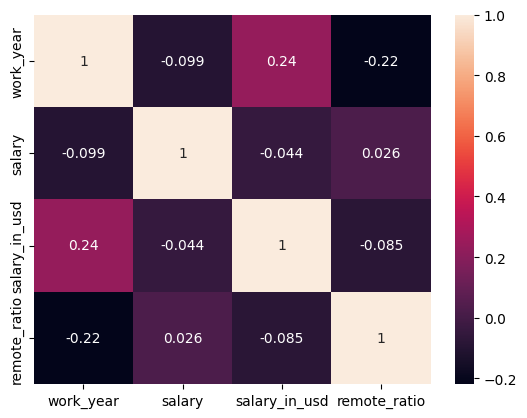

In [180]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="rocket");

# Data Preprocessing

### Treating the outliers

In [181]:
def remove_outliers_iqr_countinuous(data, columns):
    for col in columns:
        if data[col].dtype != 'object':
            q1, q3 = data[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_whisker, upper_whisker = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            filt = (data[col] < lower_whisker) | (data[col] > upper_whisker)
            data = data[~filt]
    return data.reset_index(drop=True)

In [182]:
df=remove_outliers_iqr_countinuous(df,["salary_in_usd"])

In [183]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_classified,residence_continent,company_continent
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scientist,EU,EU
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Data Engineer,NA,NA
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Data Engineer,NA,NA
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist,NA,NA
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L,Data Specialist,NA,NA
2551,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,Data Scientist,NA,NA
2552,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,Data Scientist,NA,NA
2553,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,Data Analyst,NA,NA


## Removing Irrelvant Columns

In [184]:
df.drop(["salary","job_title","salary_currency",'employee_residence', 'company_location',],axis=1,inplace=True)

In [185]:
df

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_title_classified,residence_continent,company_continent
0,2023,SE,FT,85847,100,L,Data Scientist,EU,EU
1,2023,MI,CT,30000,100,S,Data Engineer,NA,NA
2,2023,MI,CT,25500,100,S,Data Engineer,NA,NA
3,2023,SE,FT,175000,100,M,Data Scientist,NA,NA
4,2023,SE,FT,120000,100,M,Data Scientist,NA,NA
...,...,...,...,...,...,...,...,...,...
2550,2021,SE,FT,165000,100,L,Data Specialist,NA,NA
2551,2021,MI,FT,151000,100,L,Data Scientist,NA,NA
2552,2020,EN,FT,105000,100,S,Data Scientist,NA,NA
2553,2020,EN,CT,100000,100,L,Data Analyst,NA,NA


## Encoding

In [186]:
max_salaries =df.groupby("company_size")["salary_in_usd"].mean().sort_values(ascending=False)
encoding = max_salaries.rank().astype(int)
max_salaries

company_size
M    139462.612245
L    107158.955000
S     76051.705479
Name: salary_in_usd, dtype: float64

In [187]:
for col in df.select_dtypes(include=['object']):
    mean_salaries = df.groupby(col)["salary_in_usd"].mean()
    df[col] = df[col].map(mean_salaries.rank().astype(int))

In [188]:
df

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_title_classified,residence_continent,company_continent
0,2023,3,4,85847,100,2,7,5,5
1,2023,2,3,30000,100,1,8,6,6
2,2023,2,3,25500,100,1,8,6,6
3,2023,3,4,175000,100,3,7,6,6
4,2023,3,4,120000,100,3,7,6,6
...,...,...,...,...,...,...,...,...,...
2550,2021,3,4,165000,100,2,5,6,6
2551,2021,2,4,151000,100,2,7,6,6
2552,2020,1,4,105000,100,1,7,6,6
2553,2020,1,3,100000,100,2,3,6,6


# Split dataset into training and test set

In [189]:
X = df.drop(['salary_in_usd'],axis=1)
y_target = df['salary_in_usd']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.3, random_state=0)

# Feature Scaling

In [191]:
from sklearn.preprocessing import MinMaxScaler
rob_scaler = MinMaxScaler()
X_train_scale=rob_scaler.fit_transform(X_train)
X_test_scale=rob_scaler.transform(X_test)

In [192]:
X_train_scale

array([[0.66666667, 0.66666667, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.66666667, 0.66666667, 1.        , ..., 0.8       , 0.8       ,
        0.8       ],
       [0.66666667, 0.66666667, 1.        , ..., 0.7       , 1.        ,
        1.        ],
       ...,
       [1.        , 0.66666667, 1.        , ..., 0.7       , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.7       , 0.8       ,
        0.8       ],
       [0.66666667, 0.66666667, 1.        , ..., 0.6       , 1.        ,
        1.        ]])